Network diagrams _(A.K.A. graphs)_ show interconnections between a set of entities. Each entity is represented by a **node** (or vertices). Connection between nodes are represented through **links** (or edges).

We'll be using <a href="https://networkx.github.io/" target="_blank">NetworkX</a> library. But there are many other good tools available, like <a href="https://graph-tool.skewed.de/" target="_blank">Graph Tool library</a>.

> <a href="https://networkx.github.io/" target="_blank">NetworkX</a> is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12, 6)

## Creating a Graph

Create an empty graph with no nodes and no edges.

By definition, a **Graph** is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.

In [3]:
G = nx.Graph()

G

> Python’s `None` object should not be used as a node as it determines whether optional function arguments have been assigned in many functions.

## Nodes

The graph `G` can be grown in several ways. NetworkX includes many graph generator functions and facilities to read and write graphs in many formats. To get started though we’ll look at simple manipulations. You can add one node at a time,

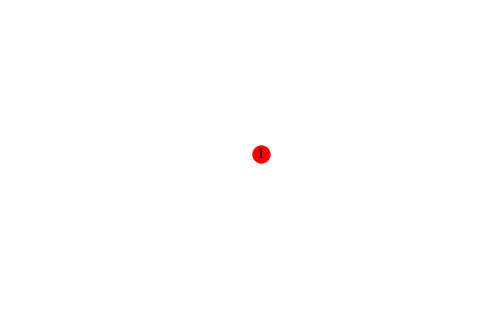

In [4]:
G.add_node(1)

nx.draw(G, with_labels=True)

add a list of nodes,

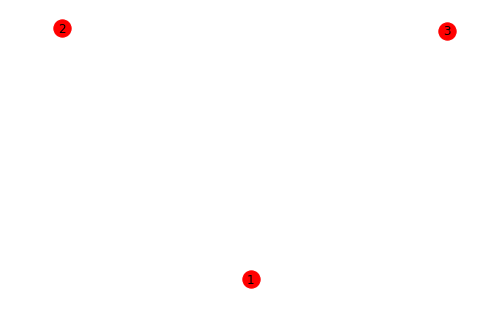

In [5]:
G.add_nodes_from([2, 3])

nx.draw(G, with_labels=True)

or add any iterable container of nodes. You can also add nodes along with node attributes if your container yields 2-tuples (node, node_attribute_dict). Node attributes are discussed further below.

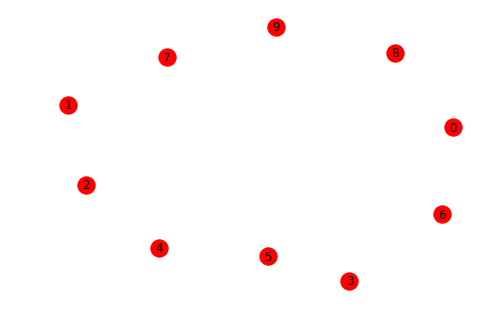

In [6]:
H = nx.path_graph(10)
G.add_nodes_from(H)

nx.draw(G, with_labels=True)

Note that `G` now contains the nodes of `H` as nodes of `G`. In contrast, you could use the graph `H` as a node in `G`.

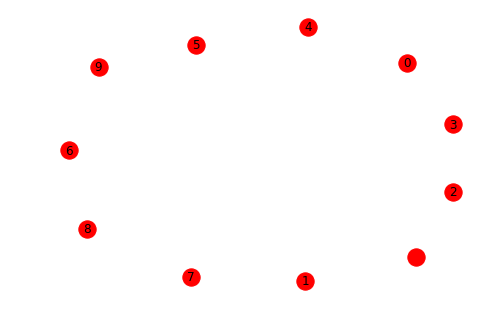

In [7]:
G.add_node(H)

nx.draw(G, with_labels=True)

The graph `G` now contains `H` as a node. This flexibility is very powerful as it allows graphs of graphs, graphs of files, graphs of functions and much more. It is worth thinking about how to structure your application so that the nodes are useful entities. Of course you can always use a unique identifier in `G` and have a separate dictionary keyed by identifier to the node information if you prefer.

> You should not change the node object if the hash depends on its contents.

## Edges

`G` can also be grown by adding one edge at a time,

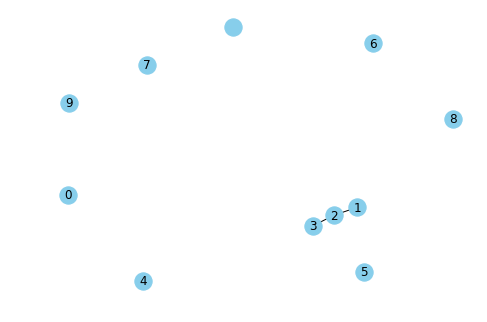

In [8]:
G.add_edge(1, 2)

e = (2, 3)
G.add_edge(*e) # unpack edge tuple*

nx.draw(G,
        with_labels=True,
        node_color="skyblue"
       )

by adding a list of edges,

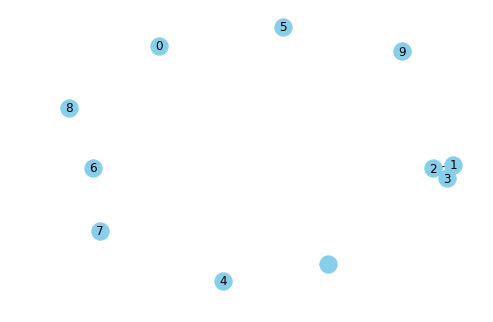

In [9]:
G.add_edges_from([(1, 2), (1, 3)])

nx.draw(G,
        with_labels=True,
        node_color="skyblue"
       )

or by adding any ebunch of edges. An ebunch is any iterable container of edge-tuples. An edge-tuple can be a 2-tuple of nodes or a 3-tuple with 2 nodes followed by an edge attribute dictionary, e.g., `(2, 3, {'weight': 3.1415})`. Edge attributes are discussed further below

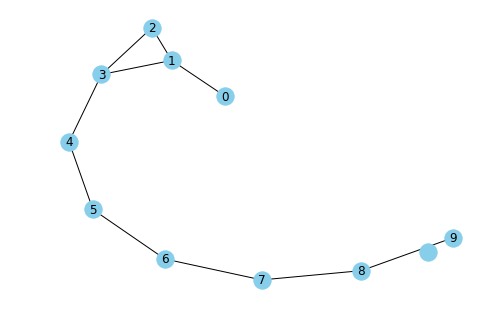

In [10]:
H = nx.path_graph(10)

G.add_edges_from(H.edges)

nx.draw(G,
        with_labels=True,
        node_color="skyblue"
       )

There are no complaints when adding existing nodes or edges. For example, after removing all nodes and edges,

In [11]:
G.clear()

we add new nodes/edges and NetworkX quietly ignores any that are already present.

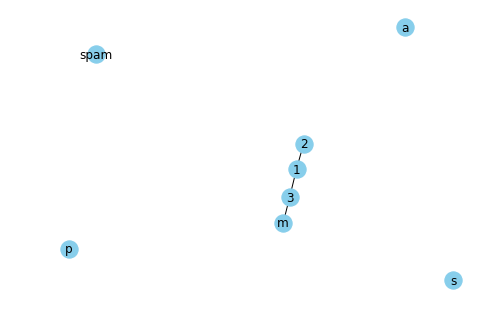

In [12]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

nx.draw(G,
        with_labels=True,
        node_color="skyblue"
       )

At this stage the graph G consists of 8 nodes and 3 edges, as can be seen by:



In [13]:
G.number_of_nodes()

8

In [14]:
G.number_of_edges()

3

We can examine the nodes and edges. Four basic graph properties facilitate reporting: `G.nodes`, `G.edges`, `G.adj` and `G.degree`. These are set-like views of the nodes, edges, neighbors (adjacencies), and degrees of nodes in a graph. They offer a continually updated read-only view into the graph structure. They are also dict-like in that you can look up node and edge data attributes via the views and iterate with data attributes using methods `.items()`, `.data('span')`. If you want a specific container type instead of a view, you can specify one. Here we use lists, though sets, dicts, tuples and other containers may be better in other contexts.



In [20]:
list(G.nodes)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [21]:
list(G.edges)

[(1, 2), (1, 3), (3, 'm')]

In [22]:
list(G.adj[1])

[2, 3]

In [16]:
G.degree[1]  # the number of edges incident to 1

2

## Basic Network from Pandas DataFrame

We can understand each DataFrame row as a connection of a node to another node.

We can't build a graph with nodes that has no connections in the graph from a DataFrame, but we can add that nodes manually.

Let's try a simple example:
- A → B
- B → C
- C → A
- F → A

In [15]:
df = pd.DataFrame({
    'from': ['A', 'B', 'C', 'F'],
    'to': ['B', 'C', 'A', 'A']
})

df

,from,to
0,A,B
1,B,C
2,C,A
3,F,A


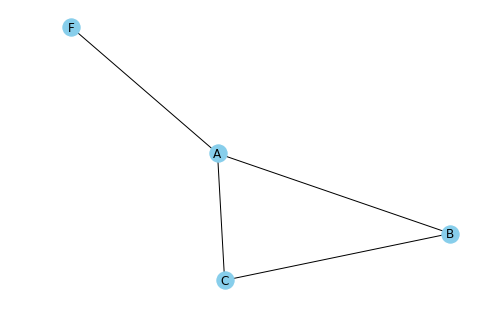

In [18]:
# Build your graph
G = nx.from_pandas_edgelist(df, 'from', 'to')
 
# Plot it
nx.draw(G,
        with_labels=True,
        node_color="skyblue"
       )

Add two more nodes without connections:

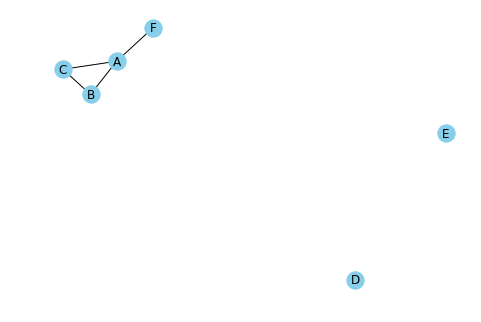

In [20]:
G.add_node('D')
G.add_node('E')

# Plot it
nx.draw(G,
        with_labels=True,
        node_color="skyblue"
       )

## Custom graph appearance

Another important thing is to make our graphs visually understandable, to achive that there are many options to customize our graphs.

These customisations are separated in 3 main categories: **nodes**, **node labels** and **edges**.

In [71]:
# Build a dataframe with your connections
df = pd.DataFrame({
    'from': ['A', 'B', 'C', 'F'],
    'to': ['B', 'C', 'A', 'A']
})

df

,from,to
0,A,B
1,B,C
2,C,A
3,F,A


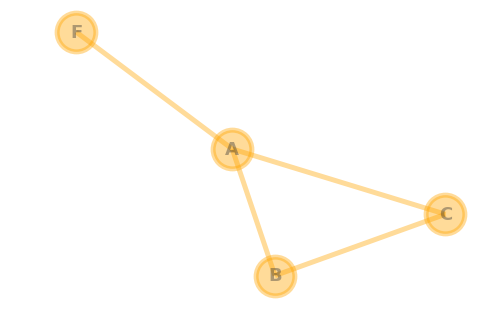

In [72]:
# Build your graph
G = nx.from_pandas_edgelist(df, 'from', 'to')
 
# Graph with Custom nodes:
nx.draw(G,
        with_labels=True,
        
        # node customizations
        node_size=1500,
        node_color="orange",
        node_shape="o",
        alpha=0.4,
        linewidths=5,
        
        # label customization
        font_size=18,
        font_color="#333333",
        font_weight="bold",
        
        # edge customization
        width=5,
        edge_color="orange",
        style="solid"
       )

plt.show()

## Background colour of network chart

Also the background color can be changed. To do that we'll need to change the `fig.get_facecolor()` function.

In [73]:
# Build a dataframe with your connections
df = pd.DataFrame({
    'from': ['A', 'B', 'C', 'F'],
    'to': ['B', 'C', 'A', 'A']
})

df

,from,to
0,A,B
1,B,C
2,C,A
3,F,A


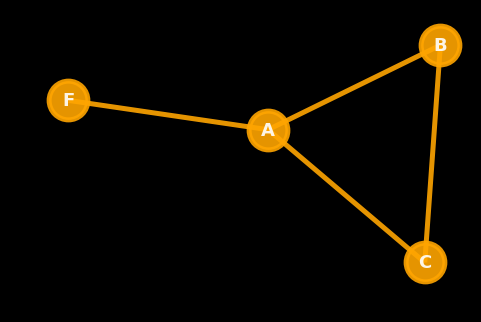

In [87]:
# Build your graph
G = nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# Custom the nodes:
fig = plt.figure()

nx.draw(G,
        with_labels=True,
        node_size=1500,
        node_color="orange",
        alpha=0.9,
        linewidths=5,
        font_size=18,
        font_color="#FFFFFF",
        font_weight="bold",
        width=5,
        edge_color="orange"
       )

fig.set_facecolor("#000000")

## Save your network chart

If you want to save the figure to png:

In [18]:
plt.savefig('yourname.png',
            facecolor=fig.get_facecolor()
           )

<Figure size 432x288 with 0 Axes>

## Network layout customizations

There are several algorithms within `networkx` to calculate nodes and edges positions of a given network.

The most used strategy is given by the _Fruchterman Reingold_ algorithm.

In [21]:
# Build a dataframe with your connections
df = pd.DataFrame({
    'from': ['A','B','C','A','E','F','E','G','G','D','F'],
    'to': ['D','A','E','C','A','F','G','D','B','G','C']
})

# Build your graph
G = nx.from_pandas_edgelist(df, 'from', 'to')

Text(0.5,1,'fruchterman_reingold')

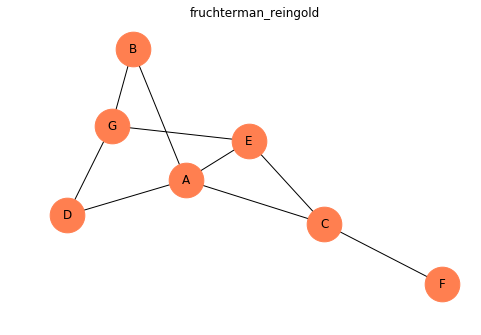

In [26]:
# Fruchterman Reingold
nx.draw(G,
        with_labels=True,
        node_size=1200,
        node_color="coral",
        pos=nx.fruchterman_reingold_layout(G)
       )

plt.title("fruchterman_reingold")

Text(0.5,1,'circular')

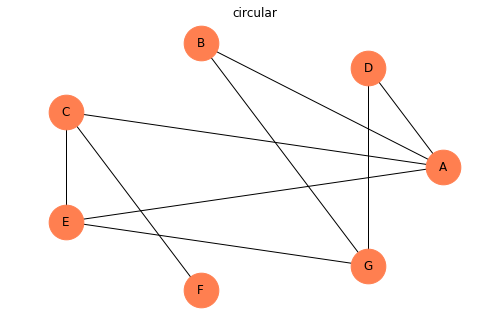

In [27]:
# Circular
nx.draw(G,
        with_labels=True,
        node_size=1200,
        node_color="coral",
        pos=nx.circular_layout(G)
       )

plt.title("circular")

Text(0.5,1,'kamada_kawai')

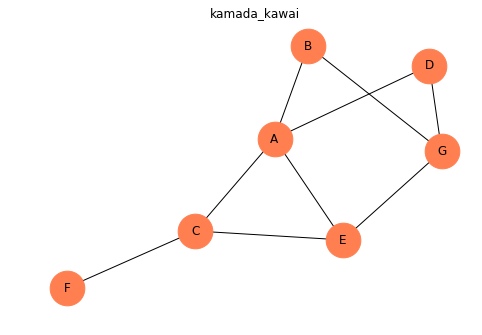

In [29]:
# Kamada Kawai
nx.draw(G,
        with_labels=True,
        node_size=1200,
        node_color="coral",
        pos=nx.kamada_kawai_layout(G)
       )

plt.title("kamada_kawai")

Text(0.5,1,'random')

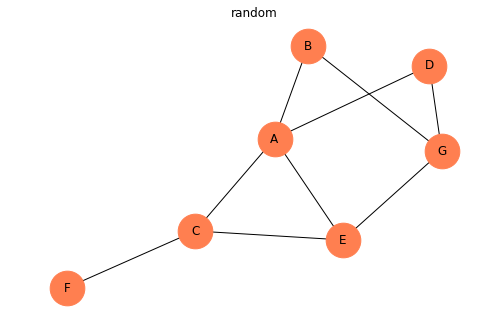

In [28]:
# Random
nx.draw(G,
        with_labels=True,
        node_size=1200,
        node_color="coral",
        pos=nx.random_layout(G)
       )

plt.title("random")

Text(0.5,1,'shell')

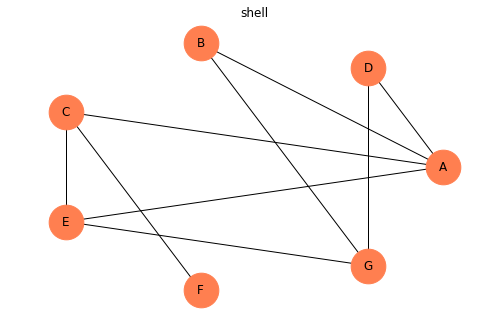

In [32]:
# Shell
nx.draw(G,
        with_labels=True,
        node_size=1200,
        node_color="coral",
        pos=nx.shell_layout(G)
       )

plt.title("shell")

Text(0.5,1,'spring')

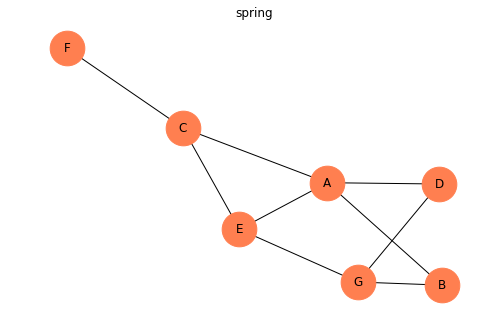

In [34]:
# Spring
nx.draw(G,
        with_labels=True,
        node_size=1200,
        node_color="coral",
        pos=nx.spring_layout(G)
       )

plt.title("spring")

Text(0.5,1,'spectral')

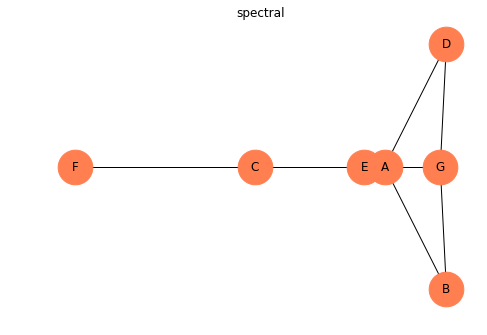

In [33]:
# Spectral
nx.draw(G,
        with_labels=True,
        node_size=1200,
        node_color="coral",
        pos=nx.spectral_layout(G)
       )

plt.title("spectral")